In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

In [2]:
rf = pd.read_csv('risk-free_return.csv',parse_dates=[0], index_col=[0])
rf

,RF
DATE,
1926-07-31,0.0022
1926-08-31,0.0025
1926-09-30,0.0023
1926-10-31,0.0032
1926-11-30,0.0031
...,...
2018-03-31,0.0012
2018-04-30,0.0014
2018-05-31,0.0014


### Use Nasdaq stocks.

In [3]:
data = pd.read_excel('NASDAQ2020.xlsx')
data

,PERMNO,Names Date,Ticker Symbol,Company Name,Price or Bid/Ask Average,Spread Between Bid and Ask,Returns without Dividends
0,10107,19860228,NaN,NaN,NaN,NaN,NaN
1,10107,19860331,MSFT,MICROSOFT CORP,27.50000,NaN,C
2,10107,19860430,MSFT,MICROSOFT CORP,32.25000,NaN,0.172727
3,10107,19860530,MSFT,MICROSOFT CORP,34.75000,NaN,0.077519
4,10107,19860630,MSFT,MICROSOFT CORP,30.75000,NaN,-0.115108
...,...,...,...,...,...,...,...
37245,93436,20190830,TSLA,TESLA INC,225.61000,NaN,-0.066222
37246,93436,20190930,TSLA,TESLA INC,240.87000,NaN,0.067639
37247,93436,20191031,TSLA,TESLA INC,314.92001,NaN,0.307427
37248,93436,20191129,TSLA,TESLA INC,329.94000,NaN,0.047695


In [4]:
data1 = data.copy()

In [5]:
data1.drop(columns = ['Company Name','Spread Between Bid and Ask'],inplace=True)

In [6]:
data1.columns=['PERMNO','date','TICKDER','PRC','RET']

In [7]:
data1['PRC']  = np.abs(data1['PRC'])
data1.dropna(inplace=True)
data1 = data1[~data1['RET'].isin(['A','B','C','D','E'])]
data1

,PERMNO,date,TICKDER,PRC,RET
2,10107,19860430,MSFT,32.25000,0.172727
3,10107,19860530,MSFT,34.75000,0.077519
4,10107,19860630,MSFT,30.75000,-0.115108
5,10107,19860731,MSFT,28.50000,-0.073171
6,10107,19860829,MSFT,28.50000,0
...,...,...,...,...,...
37245,93436,20190830,TSLA,225.61000,-0.066222
37246,93436,20190930,TSLA,240.87000,0.067639
37247,93436,20191031,TSLA,314.92001,0.307427
37248,93436,20191129,TSLA,329.94000,0.047695


In [8]:
data1['RET']=pd.to_numeric(data1['RET'])
data1.dtypes

PERMNO       int64
date         int64
TICKDER     object
PRC        float64
RET        float64
dtype: object

In [9]:
data1['date']=pd.to_datetime(data1['date'],format='%Y%m%d')
data1

,PERMNO,date,TICKDER,PRC,RET
2,10107,1986-04-30,MSFT,32.25000,0.172727
3,10107,1986-05-30,MSFT,34.75000,0.077519
4,10107,1986-06-30,MSFT,30.75000,-0.115108
5,10107,1986-07-31,MSFT,28.50000,-0.073171
6,10107,1986-08-29,MSFT,28.50000,0.000000
...,...,...,...,...,...
37245,93436,2019-08-30,TSLA,225.61000,-0.066222
37246,93436,2019-09-30,TSLA,240.87000,0.067639
37247,93436,2019-10-31,TSLA,314.92001,0.307427
37248,93436,2019-11-29,TSLA,329.94000,0.047695


In [10]:
neededstock = pd.read_sas('msf500.sas7bdat')
neededstock

,PERMNO,DATE
0,10006.0,1960-01-29
1,10006.0,1960-02-29
2,10006.0,1960-03-31
3,10006.0,1960-04-29
4,10006.0,1960-05-31
...,...,...
363571,93429.0,2019-08-30
363572,93429.0,2019-09-30
363573,93429.0,2019-10-31
363574,93429.0,2019-11-29


In [11]:
neededstock['PERMNO'] = neededstock['PERMNO'].astype('int')

In [12]:
neededstock.set_index(['PERMNO','DATE'],inplace=True)

In [13]:
neededstock

Empty DataFrame
Columns: []
Index: [(10006, 1960-01-29 00:00:00), (10006, 1960-02-29 00:00:00), (10006, 1960-03-31 00:00:00), (10006, 1960-04-29 00:00:00), (10006, 1960-05-31 00:00:00), (10006, 1960-06-30 00:00:00), (10006, 1960-07-29 00:00:00), (10006, 1960-08-31 00:00:00), (10006, 1960-09-30 00:00:00), (10006, 1960-10-31 00:00:00), (10006, 1960-11-30 00:00:00), (10006, 1960-12-30 00:00:00), (10006, 1961-01-31 00:00:00), (10006, 1961-02-28 00:00:00), (10006, 1961-03-30 00:00:00), (10006, 1961-04-28 00:00:00), (10006, 1961-05-31 00:00:00), (10006, 1961-06-30 00:00:00), (10006, 1961-07-31 00:00:00), (10006, 1961-08-31 00:00:00), (10006, 1961-09-29 00:00:00), (10006, 1961-10-31 00:00:00), (10006, 1961-11-30 00:00:00), (10006, 1961-12-29 00:00:00), (10006, 1962-01-31 00:00:00), (10006, 1962-02-28 00:00:00), (10006, 1962-03-30 00:00:00), (10006, 1962-04-30 00:00:00), (10006, 1962-05-31 00:00:00), (10006, 1962-06-29 00:00:00), (10006, 1962-07-31 00:00:00), (10006, 1962-08-31 00:00:00), (10006, 1962-09-28 00:00:00), (10006, 1962-10-31 00:00:00), (10006, 1962-11-30 00:00:00), (10006, 1962-12-31 00:00:00), (10006, 1963-01-31 00:00:00), (10006, 1963-02-28 00:00:00), (10006, 1963-03-29 00:00:00), (10006, 1963-04-30 00:00:00), (10006, 1963-05-31 00:00:00), (10006, 1963-06-28 00:00:00), (10006, 1963-07-31 00:00:00), (10006, 1963-08-30 00:00:00), (10006, 1963-09-30 00:00:00), (10006, 1963-10-31 00:00:00), (10006, 1963-11-29 00:00:00), (10006, 1963-12-31 00:00:00), (10006, 1964-01-31 00:00:00), (10006, 1964-02-28 00:00:00), (10006, 1964-03-31 00:00:00), (10006, 1964-04-30 00:00:00), (10006, 1964-05-28 00:00:00), (10006, 1964-06-30 00:00:00), (10006, 1964-07-31 00:00:00), (10006, 1964-08-31 00:00:00), (10006, 1964-09-30 00:00:00), (10006, 1964-10-30 00:00:00), (10006, 1964-11-30 00:00:00), (10006, 1964-11-30 00:00:00), (10006, 1964-12-31 00:00:00), (10006, 1965-01-29 00:00:00), (10006, 1965-02-26 00:00:00), (10006, 1965-02-26 00:00:00), (10006, 1965-03-31 00:00:00), (10006, 1965-04-30 00:00:00), (10006, 1965-05-28 00:00:00), (10006, 1965-05-28 00:00:00), (10006, 1965-06-30 00:00:00), (10006, 1965-07-30 00:00:00), (10006, 1965-08-31 00:00:00), (10006, 1965-08-31 00:00:00), (10006, 1965-09-30 00:00:00), (10006, 1965-10-29 00:00:00), (10006, 1965-11-30 00:00:00), (10006, 1965-12-31 00:00:00), (10006, 1966-01-31 00:00:00), (10006, 1966-02-28 00:00:00), (10006, 1966-03-31 00:00:00), (10006, 1966-04-29 00:00:00), (10006, 1966-05-31 00:00:00), (10006, 1966-06-30 00:00:00), (10006, 1966-07-29 00:00:00), (10006, 1966-08-31 00:00:00), (10006, 1966-09-30 00:00:00), (10006, 1966-10-31 00:00:00), (10006, 1966-11-30 00:00:00), (10006, 1966-12-30 00:00:00), (10006, 1967-01-31 00:00:00), (10006, 1967-02-28 00:00:00), (10006, 1967-03-31 00:00:00), (10006, 1967-04-28 00:00:00), (10006, 1967-05-31 00:00:00), (10006, 1967-06-30 00:00:00), (10006, 1967-07-31 00:00:00), (10006, 1967-08-31 00:00:00), (10006, 1967-09-29 00:00:00), (10006, 1967-10-31 00:00:00), (10006, 1967-11-30 00:00:00), (10006, 1967-12-29 00:00:00), ...]

[363576 rows x 0 columns]

In [14]:
data2 = data1.set_index(['PERMNO','date'])
data2

TICKDER        PRC       RET
PERMNO date                                   
10107  1986-04-30    MSFT   32.25000  0.172727
       1986-05-30    MSFT   34.75000  0.077519
       1986-06-30    MSFT   30.75000 -0.115108
       1986-07-31    MSFT   28.50000 -0.073171
       1986-08-29    MSFT   28.50000  0.000000
...                   ...        ...       ...
93436  2019-08-30    TSLA  225.61000 -0.066222
       2019-09-30    TSLA  240.87000  0.067639
       2019-10-31    TSLA  314.92001  0.307427
       2019-11-29    TSLA  329.94000  0.047695
       2019-12-31    TSLA  418.32999  0.267897

[36597 rows x 3 columns]

In [15]:
data2 = data2.loc[data2.index.isin(neededstock.index)]
data2

TICKDER        PRC       RET
PERMNO date                                   
10107  1994-06-30    MSFT   51.62500 -0.039535
       1994-07-29    MSFT   51.50000 -0.002421
       1994-08-31    MSFT   58.12500  0.128641
       1994-09-30    MSFT   56.12500 -0.034409
       1994-10-31    MSFT   63.00000  0.122494
...                   ...        ...       ...
93089  2019-08-30    VRSK  161.53999  0.064724
       2019-09-30    VRSK  158.14000 -0.021047
       2019-10-31    VRSK  144.70000 -0.084988
       2019-11-29    VRSK  147.48000  0.019212
       2019-12-31    VRSK  149.34000  0.012612

[16755 rows x 3 columns]

In [16]:
data3 = data2.dropna()
data3

TICKDER        PRC       RET
PERMNO date                                   
10107  1994-06-30    MSFT   51.62500 -0.039535
       1994-07-29    MSFT   51.50000 -0.002421
       1994-08-31    MSFT   58.12500  0.128641
       1994-09-30    MSFT   56.12500 -0.034409
       1994-10-31    MSFT   63.00000  0.122494
...                   ...        ...       ...
93089  2019-08-30    VRSK  161.53999  0.064724
       2019-09-30    VRSK  158.14000 -0.021047
       2019-10-31    VRSK  144.70000 -0.084988
       2019-11-29    VRSK  147.48000  0.019212
       2019-12-31    VRSK  149.34000  0.012612

[16755 rows x 3 columns]

In [17]:
data3.reset_index('PERMNO',inplace=True)
data3.index = data3.index.map(lambda x: 100*x.year + x.month)
data3.index = pd.to_datetime(data3.index,format='%Y%m')+MonthEnd(1)
data3['RF'] = rf['RF']
data3['XRET'] = data3['RET']-data3['RF']
data3

,PERMNO,TICKDER,PRC,RET,RF,XRET
date,,,,,,
1994-06-30,10107,MSFT,51.62500,-0.039535,0.0031,-0.042635
1994-07-31,10107,MSFT,51.50000,-0.002421,0.0028,-0.005221
1994-08-31,10107,MSFT,58.12500,0.128641,0.0037,0.124941
1994-09-30,10107,MSFT,56.12500,-0.034409,0.0037,-0.038109
1994-10-31,10107,MSFT,63.00000,0.122494,0.0038,0.118694
...,...,...,...,...,...,...
2019-08-31,93089,VRSK,161.53999,0.064724,NaN,NaN
2019-09-30,93089,VRSK,158.14000,-0.021047,NaN,NaN
2019-10-31,93089,VRSK,144.70000,-0.084988,NaN,NaN


In [18]:
data3.reset_index(inplace=True)
data3.set_index(['PERMNO','date'],inplace=True)

In [19]:
data3['LagRet']=data3['XRET'].groupby('PERMNO').shift(1)
data3.dropna(inplace=True)
data3

TICKDER      PRC       RET      RF      XRET    LagRet
PERMNO date                                                             
10107  1994-07-31    MSFT   51.500 -0.002421  0.0028 -0.005221 -0.042635
       1994-08-31    MSFT   58.125  0.128641  0.0037  0.124941 -0.005221
       1994-09-30    MSFT   56.125 -0.034409  0.0037 -0.038109  0.124941
       1994-10-31    MSFT   63.000  0.122494  0.0038  0.118694 -0.038109
       1994-11-30    MSFT   62.875 -0.001984  0.0037 -0.005684  0.118694
...                   ...      ...       ...     ...       ...       ...
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778

[15340 rows x 6 columns]

In [20]:
data3['MA6m'] = data3['LagRet'].groupby(level='PERMNO',group_keys=False).rolling(6).mean()
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1994-07-31    MSFT   51.500 -0.002421  0.0028 -0.005221 -0.042635   
       1994-08-31    MSFT   58.125  0.128641  0.0037  0.124941 -0.005221   
       1994-09-30    MSFT   56.125 -0.034409  0.0037 -0.038109  0.124941   
       1994-10-31    MSFT   63.000  0.122494  0.0038  0.118694 -0.038109   
       1994-11-30    MSFT   62.875 -0.001984  0.0037 -0.005684  0.118694   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m  
PERMNO date                  
10107  1994-07-31       NaN  
       1994-08-31       NaN  
       1994-09-30       NaN  
       1994-10-31       NaN  
       1994-11-30       NaN  
...                     ...  
93089  2018-03-31  0.039328  
       2018-04-30  0.037829  
       2018-05-31  0.037946  
       2018-06-30  0.015236  
       2018-07-31  0.018075  

[15340 rows x 7 columns]

In [21]:
data3['MA1y'] = data3['LagRet'].groupby(level='PERMNO',group_keys=False).rolling(12).mean()
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1994-07-31    MSFT   51.500 -0.002421  0.0028 -0.005221 -0.042635   
       1994-08-31    MSFT   58.125  0.128641  0.0037  0.124941 -0.005221   
       1994-09-30    MSFT   56.125 -0.034409  0.0037 -0.038109  0.124941   
       1994-10-31    MSFT   63.000  0.122494  0.0038  0.118694 -0.038109   
       1994-11-30    MSFT   62.875 -0.001984  0.0037 -0.005684  0.118694   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  
PERMNO date                            
10107  1994-07-31       NaN       NaN  
       1994-08-31       NaN       NaN  
       1994-09-30       NaN       NaN  
       1994-10-31       NaN       NaN  
       1994-11-30       NaN       NaN  
...                     ...       ...  
93089  2018-03-31  0.039328  0.017867  
       2018-04-30  0.037829  0.021057  
       2018-05-31  0.037946  0.021230  
       2018-06-30  0.015236  0.022931  
       2018-07-31  0.018075  0.020377  

[15340 rows x 8 columns]

In [22]:
data3.dropna(subset=['MA1y'], inplace=True)
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1995-06-30    MSFT   90.375  0.067159  0.0047  0.062459  0.030533   
       1995-07-31    MSFT   90.500  0.001383  0.0045 -0.003117  0.062459   
       1995-08-31    MSFT   92.500  0.022099  0.0047  0.017399 -0.003117   
       1995-09-30    MSFT   90.500 -0.021622  0.0043 -0.025922  0.017399   
       1995-10-31    MSFT  100.000  0.104972  0.0047  0.100272 -0.025922   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  
PERMNO date                            
10107  1995-06-30  0.048646  0.036989  
       1995-07-31  0.064428  0.045746  
       1995-08-31  0.069380  0.045922  
       1995-09-30  0.062771  0.036960  
       1995-10-31  0.037723  0.037975  
...                     ...       ...  
93089  2018-03-31  0.039328  0.017867  
       2018-04-30  0.037829  0.021057  
       2018-05-31  0.037946  0.021230  
       2018-06-30  0.015236  0.022931  
       2018-07-31  0.018075  0.020377  

[14424 rows x 8 columns]

In [23]:
data3['signal'] = 0
data3.loc[(data3['MA1y']<data3['MA6m']),'signal'] = 1
data3.loc[(data3['MA1y']>data3['MA6m']),'signal'] = -1
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1995-06-30    MSFT   90.375  0.067159  0.0047  0.062459  0.030533   
       1995-07-31    MSFT   90.500  0.001383  0.0045 -0.003117  0.062459   
       1995-08-31    MSFT   92.500  0.022099  0.0047  0.017399 -0.003117   
       1995-09-30    MSFT   90.500 -0.021622  0.0043 -0.025922  0.017399   
       1995-10-31    MSFT  100.000  0.104972  0.0047  0.100272 -0.025922   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  signal  
PERMNO date                                    
10107  1995-06-30  0.048646  0.036989       1  
       1995-07-31  0.064428  0.045746       1  
       1995-08-31  0.069380  0.045922       1  
       1995-09-30  0.062771  0.036960       1  
       1995-10-31  0.037723  0.037975      -1  
...                     ...       ...     ...  
93089  2018-03-31  0.039328  0.017867       1  
       2018-04-30  0.037829  0.021057       1  
       2018-05-31  0.037946  0.021230       1  
       2018-06-30  0.015236  0.022931      -1  
       2018-07-31  0.018075  0.020377      -1  

[14424 rows x 9 columns]

In [24]:
data3['portret']=data3['XRET']*data3['signal']
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1995-06-30    MSFT   90.375  0.067159  0.0047  0.062459  0.030533   
       1995-07-31    MSFT   90.500  0.001383  0.0045 -0.003117  0.062459   
       1995-08-31    MSFT   92.500  0.022099  0.0047  0.017399 -0.003117   
       1995-09-30    MSFT   90.500 -0.021622  0.0043 -0.025922  0.017399   
       1995-10-31    MSFT  100.000  0.104972  0.0047  0.100272 -0.025922   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  signal   portret  
PERMNO date                                              
10107  1995-06-30  0.048646  0.036989       1  0.062459  
       1995-07-31  0.064428  0.045746       1 -0.003117  
       1995-08-31  0.069380  0.045922       1  0.017399  
       1995-09-30  0.062771  0.036960       1 -0.025922  
       1995-10-31  0.037723  0.037975      -1 -0.100272  
...                     ...       ...     ...       ...  
93089  2018-03-31  0.039328  0.017867       1  0.016512  
       2018-04-30  0.037829  0.021057       1  0.022158  
       2018-05-31  0.037946  0.021230       1 -0.003373  
       2018-06-30  0.015236  0.022931      -1 -0.011778  
       2018-07-31  0.018075  0.020377      -1 -0.026085  

[14424 rows x 10 columns]

In [25]:
data3['portret+1']=data3['portret']+1
data3

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1995-06-30    MSFT   90.375  0.067159  0.0047  0.062459  0.030533   
       1995-07-31    MSFT   90.500  0.001383  0.0045 -0.003117  0.062459   
       1995-08-31    MSFT   92.500  0.022099  0.0047  0.017399 -0.003117   
       1995-09-30    MSFT   90.500 -0.021622  0.0043 -0.025922  0.017399   
       1995-10-31    MSFT  100.000  0.104972  0.0047  0.100272 -0.025922   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  signal   portret  portret+1  
PERMNO date                                                         
10107  1995-06-30  0.048646  0.036989       1  0.062459   1.062459  
       1995-07-31  0.064428  0.045746       1 -0.003117   0.996883  
       1995-08-31  0.069380  0.045922       1  0.017399   1.017399  
       1995-09-30  0.062771  0.036960       1 -0.025922   0.974078  
       1995-10-31  0.037723  0.037975      -1 -0.100272   0.899728  
...                     ...       ...     ...       ...        ...  
93089  2018-03-31  0.039328  0.017867       1  0.016512   1.016512  
       2018-04-30  0.037829  0.021057       1  0.022158   1.022158  
       2018-05-31  0.037946  0.021230       1 -0.003373   0.996627  
       2018-06-30  0.015236  0.022931      -1 -0.011778   0.988222  
       2018-07-31  0.018075  0.020377      -1 -0.026085   0.973915  

[14424 rows x 11 columns]

In [26]:
data4 = data3.copy()

In [27]:
data4['cumret'] = data4['portret+1'].groupby('PERMNO').cumprod()
data4

TICKDER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                                
10107  1995-06-30    MSFT   90.375  0.067159  0.0047  0.062459  0.030533   
       1995-07-31    MSFT   90.500  0.001383  0.0045 -0.003117  0.062459   
       1995-08-31    MSFT   92.500  0.022099  0.0047  0.017399 -0.003117   
       1995-09-30    MSFT   90.500 -0.021622  0.0043 -0.025922  0.017399   
       1995-10-31    MSFT  100.000  0.104972  0.0047  0.100272 -0.025922   
...                   ...      ...       ...     ...       ...       ...   
93089  2018-03-31    VRSK  104.000  0.017712  0.0012  0.016512  0.020289   
       2018-04-30    VRSK  106.450  0.023558  0.0014  0.022158  0.016512   
       2018-05-31    VRSK  106.240 -0.001973  0.0014 -0.003373  0.022158   
       2018-06-30    VRSK  107.640  0.013178  0.0014  0.011778 -0.003373   
       2018-07-31    VRSK  110.620  0.027685  0.0016  0.026085  0.011778   

                       MA6m      MA1y  signal   portret  portret+1    cumret  
PERMNO date                                                                   
10107  1995-06-30  0.048646  0.036989       1  0.062459   1.062459  1.062459  
       1995-07-31  0.064428  0.045746       1 -0.003117   0.996883  1.059147  
       1995-08-31  0.069380  0.045922       1  0.017399   1.017399  1.077575  
       1995-09-30  0.062771  0.036960       1 -0.025922   0.974078  1.049643  
       1995-10-31  0.037723  0.037975      -1 -0.100272   0.899728  0.944393  
...                     ...       ...     ...       ...        ...       ...  
93089  2018-03-31  0.039328  0.017867       1  0.016512   1.016512  1.117883  
       2018-04-30  0.037829  0.021057       1  0.022158   1.022158  1.142653  
       2018-05-31  0.037946  0.021230       1 -0.003373   0.996627  1.138799  
       2018-06-30  0.015236  0.022931      -1 -0.011778   0.988222  1.125386  
       2018-07-31  0.018075  0.020377      -1 -0.026085   0.973915  1.096031  

[14424 rows x 12 columns]

In [28]:
data5 = data4.reset_index('date')
data5

,date,TICKDER,PRC,RET,RF,XRET,LagRet,MA6m,MA1y,signal,portret,portret+1,cumret
PERMNO,,,,,,,,,,,,,
10107,1995-06-30,MSFT,90.375,0.067159,0.0047,0.062459,0.030533,0.048646,0.036989,1,0.062459,1.062459,1.062459
10107,1995-07-31,MSFT,90.500,0.001383,0.0045,-0.003117,0.062459,0.064428,0.045746,1,-0.003117,0.996883,1.059147
10107,1995-08-31,MSFT,92.500,0.022099,0.0047,0.017399,-0.003117,0.069380,0.045922,1,0.017399,1.017399,1.077575
10107,1995-09-30,MSFT,90.500,-0.021622,0.0043,-0.025922,0.017399,0.062771,0.036960,1,-0.025922,0.974078,1.049643
10107,1995-10-31,MSFT,100.000,0.104972,0.0047,0.100272,-0.025922,0.037723,0.037975,-1,-0.100272,0.899728,0.944393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93089,2018-03-31,VRSK,104.000,0.017712,0.0012,0.016512,0.020289,0.039328,0.017867,1,0.016512,1.016512,1.117883
93089,2018-04-30,VRSK,106.450,0.023558,0.0014,0.022158,0.016512,0.037829,0.021057,1,0.022158,1.022158,1.142653
93089,2018-05-31,VRSK,106.240,-0.001973,0.0014,-0.003373,0.022158,0.037946,0.021230,1,-0.003373,0.996627,1.138799


In [29]:
def quintiles(inser):
    outser = pd.qcut(inser, q=5, labels=range(1,6))
    return outser

In [30]:
def getMomListbypp(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE1']<=3)&(momentum1['QUINTILE3']!=5)]
    list1 = momentum1res.index.tolist()
    return list1

In [31]:
def getMomListbypr(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE1']<=3)&(momentum1['QUINTILE4']!=5)]
    list1 = momentum1res.index.tolist()
    return list1

In [32]:
def getMomListbysp(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE2']<=3)&(momentum1['QUINTILE3']!=5)]
    list1 = momentum1res.index.tolist()
    return list1

In [33]:
def getMomListbysr(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE2']<=3)&(momentum1['QUINTILE4']!=5)]
    list1 = momentum1res.index.tolist()
    return list1

In [34]:
def getReversalPortRet(stocklist,startdate,enddate):
    reversal_data1 = data3.loc[stocklist]
    reversal_data11 = reversal_data1.reset_index('PERMNO')
    reversal_data11 = reversal_data11.loc[(reversal_data11.index<=enddate) & (reversal_data11.index>startdate)]
    reversalmean1 = reversal_data11['MA1y'].groupby('date').mean()
    reversalmean1 = pd.DataFrame(reversalmean1)
    reversal_data11['AvgMA1y'] = reversalmean1
    reversal_data11['diff'] = reversal_data11['LagRet']-reversal_data11['AvgMA1y']
    reversal_data11 = reversal_data11.reset_index()
    reversal_data11 = reversal_data11.set_index(['date','PERMNO'])
    reversal_data11 = reversal_data11.sort_index()
    posisum = reversal_data11.loc[(reversal_data11['diff']>0)].groupby('date').sum()['diff']
    posisum = pd.DataFrame(posisum)
    negsum = reversal_data11.loc[(reversal_data11['diff']<=0)].groupby('date').sum()['diff']
    negsum = pd.DataFrame(negsum)
    reversal_data11 = reversal_data11.reset_index('PERMNO')
    posiweight = reversal_data11.loc[(reversal_data11['diff']<=0),'diff']/negsum['diff']
    negweight = (-1)*reversal_data11.loc[(reversal_data11['diff']>0),'diff']/posisum['diff']
    posipermno=reversal_data11.loc[(reversal_data11['diff']<=0),'PERMNO']
    posipermno=pd.DataFrame(posipermno)
    posipermno=posipermno.reset_index()
    negpermno=reversal_data11.loc[(reversal_data11['diff']>0),'PERMNO']
    negpermno=pd.DataFrame(negpermno)
    negpermno=negpermno.reset_index()
    reversal_data11 = reversal_data11.reset_index()
    posiweight = pd.DataFrame(posiweight)
    posiweight = posiweight.reset_index()
    posiweight['PERMNO']=posipermno['PERMNO']
    posiweight=posiweight.set_index(['date','PERMNO'])
    negweight = pd.DataFrame(negweight)
    negweight = negweight.reset_index()
    negweight['PERMNO']=negpermno['PERMNO']
    negweight=negweight.set_index(['date','PERMNO'])
    reversal_data11 = reversal_data11.set_index(['date','PERMNO'])
    reversal_data11['weight'] = posiweight['diff']
    reversal_data11['negweight'] = negweight['diff']
    reversal_data11['weight']=reversal_data11['weight'].fillna(reversal_data11['negweight'])
    reversal_data11.drop('negweight',axis=1,inplace=True)
    reversal_data11['act_ret']=reversal_data11['XRET']*reversal_data11['weight']
    port_ret=reversal_data11['act_ret'].groupby('date').sum()
    port_ret=pd.DataFrame(port_ret)
    port_ret.index = port_ret.index.map(lambda x: 100*x.year + x.month)
    port_ret.index = pd.to_datetime(port_ret.index,format='%Y%m')+MonthEnd(1)
    a = reversal_data11.reset_index()
    a = a.loc[(a['weight']!=0),['date','weight']]
    num_stocks = a.groupby('date')['weight'].count().min()
    return port_ret,num_stocks

In [35]:
# Get the Momentum List by portfolio return as momentum performance and price std of stocks as stock quality selection.

list1pp = getMomListbypp('1965-01-01','1970-12-31')
list2pp = getMomListbypp('1975-01-01','1980-12-31')
list3pp = getMomListbypp('1985-01-01','1990-12-31')
list4pp = getMomListbypp('1995-01-01','2000-12-31')
list5pp = getMomListbypp('2005-01-01','2010-12-31')
[port_ret1pp,num1pp] = getReversalPortRet(list1pp,'1971-01-01','1980-12-31')
[port_ret2pp,num2pp] = getReversalPortRet(list2pp,'1981-01-01','1990-12-31')
[port_ret3pp,num3pp] = getReversalPortRet(list3pp,'1991-01-01','2000-12-31')
[port_ret4pp,num4pp] = getReversalPortRet(list4pp,'2001-01-01','2010-12-31')
[port_ret5pp,num5pp]= getReversalPortRet(list5pp,'2011-01-01','2018-12-31')
total_respp = pd.concat([port_ret1pp,port_ret2pp,port_ret3pp,port_ret4pp,port_ret5pp],axis=0)
minnumstockspp = np.array([num1pp,num2pp,num3pp,num4pp,num5pp])
print(minnumstockspp)

[ 2  2  5 13 22]


In [36]:
# Get the Momentum List by portfolio return as momentum performance and return std of stocks as stock quality selection.

list1pr = getMomListbypr('1965-01-01','1970-12-31')
list2pr = getMomListbypr('1975-01-01','1980-12-31')
list3pr = getMomListbypr('1985-01-01','1990-12-31')
list4pr = getMomListbypr('1995-01-01','2000-12-31')
list5pr = getMomListbypr('2005-01-01','2010-12-31')
[port_ret1pr,num1pr] = getReversalPortRet(list1pr,'1971-01-01','1980-12-31')
[port_ret2pr,num2pr] = getReversalPortRet(list2pr,'1981-01-01','1990-12-31')
[port_ret3pr,num3pr] = getReversalPortRet(list3pr,'1991-01-01','2000-12-31')
[port_ret4pr,num4pr] = getReversalPortRet(list4pr,'2001-01-01','2010-12-31')
[port_ret5pr,num5pr]= getReversalPortRet(list5pr,'2011-01-01','2018-12-31')
total_respr = pd.concat([port_ret1pr,port_ret2pr,port_ret3pr,port_ret4pr,port_ret5pr],axis=0)
minnumstockspr = np.array([num1pr,num2pr,num3pr,num4pr,num5pr])
print(minnumstockspr)

[ 2  2  4 14 23]


In [37]:
# Get the Momentum List by portfolio sharpe ratio as momentum performance and price std of stocks as stock quality selection.

list1sp = getMomListbysp('1965-01-01','1970-12-31')
list2sp = getMomListbysp('1975-01-01','1980-12-31')
list3sp = getMomListbysp('1985-01-01','1990-12-31')
list4sp = getMomListbysp('1995-01-01','2000-12-31')
list5sp = getMomListbysp('2005-01-01','2010-12-31')
[port_ret1sp,num1sp] = getReversalPortRet(list1sp,'1971-01-01','1980-12-31')
[port_ret2sp,num2sp] = getReversalPortRet(list2sp,'1981-01-01','1990-12-31')
[port_ret3sp,num3sp] = getReversalPortRet(list3sp,'1991-01-01','2000-12-31')
[port_ret4sp,num4sp] = getReversalPortRet(list4sp,'2001-01-01','2010-12-31')
[port_ret5sp,num5sp]= getReversalPortRet(list5sp,'2011-01-01','2018-12-31')
total_ressp = pd.concat([port_ret1sp,port_ret2sp,port_ret3sp,port_ret4sp,port_ret5sp],axis=0)
minnumstockssp = np.array([num1sp,num2sp,num3sp,num4sp,num5sp])
print(minnumstockssp)

[ 1  2  5 12 23]


In [38]:
# Get the Momentum List by portfolio sharpe ratio as momentum performance and return std of stocks as stock quality selection.

list1sr = getMomListbysr('1965-01-01','1970-12-31')
list2sr = getMomListbysr('1975-01-01','1980-12-31')
list3sr = getMomListbysr('1985-01-01','1990-12-31')
list4sr = getMomListbysr('1995-01-01','2000-12-31')
list5sr = getMomListbysr('2005-01-01','2010-12-31')
[port_ret1sr,num1sr] = getReversalPortRet(list1sr,'1971-01-01','1980-12-31')
[port_ret2sr,num2sr] = getReversalPortRet(list2sr,'1981-01-01','1990-12-31')
[port_ret3sr,num3sr] = getReversalPortRet(list3sr,'1991-01-01','2000-12-31')
[port_ret4sr,num4sr] = getReversalPortRet(list4sr,'2001-01-01','2010-12-31')
[port_ret5sr,num5sr]= getReversalPortRet(list5sr,'2011-01-01','2018-12-31')
total_ressr = pd.concat([port_ret1sr,port_ret2sr,port_ret3sr,port_ret4sr,port_ret5sr],axis=0)
minnumstockssr = np.array([num1sr,num2sr,num3sr,num4sr,num5sr])
print(minnumstockssr)

[ 2  2  4 14 24]


In [39]:
total_respp['rf'] = rf['RF']
total_respp['cumret']= 1+total_respp['act_ret']+total_respp['rf']
total_respp['value'] = total_respp['cumret'].cumprod()

total_respr['rf'] = rf['RF']
total_respr['cumret']= 1+total_respr['act_ret']+total_respr['rf']
total_respr['value'] = total_respr['cumret'].cumprod()

total_ressp['rf'] = rf['RF']
total_ressp['cumret']= 1+total_ressp['act_ret']+total_ressp['rf']
total_ressp['value'] = total_ressp['cumret'].cumprod()

total_ressr['rf'] = rf['RF']
total_ressr['cumret']= 1+total_ressr['act_ret']+total_ressr['rf']
total_ressr['value'] = total_ressr['cumret'].cumprod()

In [40]:
import matplotlib.pyplot as plt

In [41]:
Nasdaq = pd.read_csv('^IXIC.csv',parse_dates=[0])
Nasdaq = Nasdaq[['Date','Adj Close']]
Nasdaq['Return'] = Nasdaq['Adj Close'].pct_change()
Nasdaq.dropna(inplace=True)
Nasdaq.Date = Nasdaq.Date.map(lambda x: 100*x.year + x.month)
Nasdaq.Date = pd.to_datetime(Nasdaq.Date,format='%Y%m')+MonthEnd(1)
Nasdaq.set_index('Date',inplace=True)
Nasdaq

,Adj Close,Return
Date,,
1971-03-31,105.970001,0.045688
1971-04-30,112.300003,0.059734
1971-05-31,108.250000,-0.036064
1971-06-30,107.800003,-0.004157
1971-07-31,105.269997,-0.023469
...,...,...
2020-07-31,10745.269531,0.068249
2020-08-31,11775.459961,0.095874
2020-09-30,11167.509766,-0.051629


In [42]:
Nasdaq['value'] = (Nasdaq['Return']+1).cumprod()

In [43]:
Nasdaq = Nasdaq.loc['1970':]

Text(0.5, 1.0, 'Portfolio Performance from 1970 to 2018')

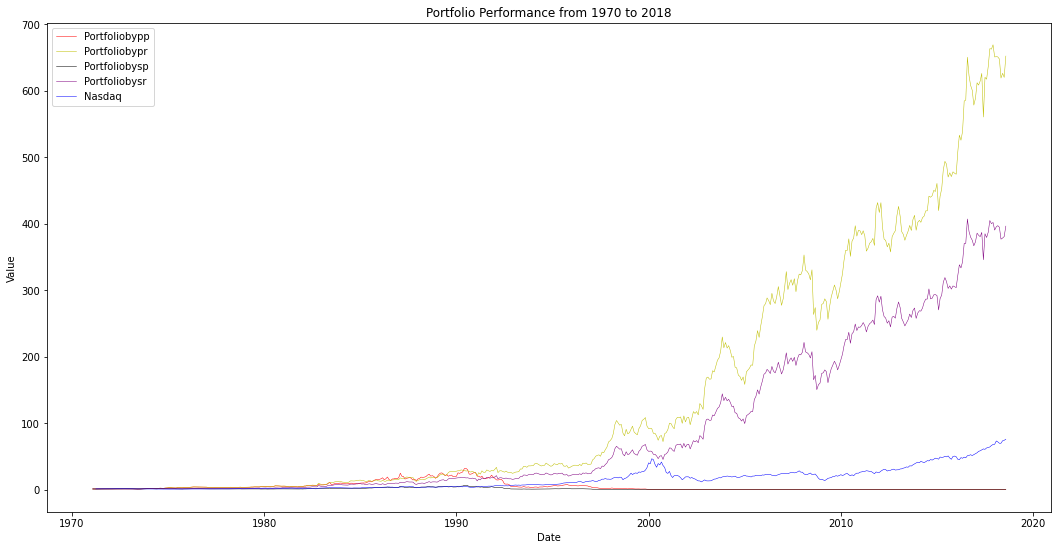

In [44]:
plt.figure(figsize=(18,9))
plt.plot(total_respp['value'],color = 'r',linewidth = 0.5,label='Portfoliobypp')
plt.plot(total_respr['value'],color = 'y',linewidth = 0.5,label='Portfoliobypr')
plt.plot(total_ressp['value'],color = 'black',linewidth = 0.5,label='Portfoliobysp')
plt.plot(total_ressr['value'],color = 'purple',linewidth = 0.5,label='Portfoliobysr')
plt.plot(Nasdaq.loc[:'2018-07-31','value'],color = 'b',linewidth = 0.5,label='Nasdaq')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 1970 to 2018')

In [45]:
res2000pp = total_respp.loc['2000':,'cumret']
res2000pp = pd.DataFrame(res2000pp)
res2000pp['value'] = res2000pp['cumret'].cumprod()

res2000pr = total_respr.loc['2000':,'cumret']
res2000pr = pd.DataFrame(res2000pr)
res2000pr['value'] = res2000pr['cumret'].cumprod()

res2000sp = total_ressp.loc['2000':,'cumret']
res2000sp = pd.DataFrame(res2000sp)
res2000sp['value'] = res2000sp['cumret'].cumprod()

res2000sr = total_ressr.loc['2000':,'cumret']
res2000sr = pd.DataFrame(res2000sr)
res2000sr['value'] = res2000sr['cumret'].cumprod()

In [46]:
Nasdaq2000 = Nasdaq.loc['2000':'2018-07-31','Return']
Nasdaq2000 = pd.DataFrame(Nasdaq2000)
Nasdaq2000['value'] = (Nasdaq2000['Return']+1).cumprod()

Text(0.5, 1.0, 'Portfolio Performance from 2000 to 2018')

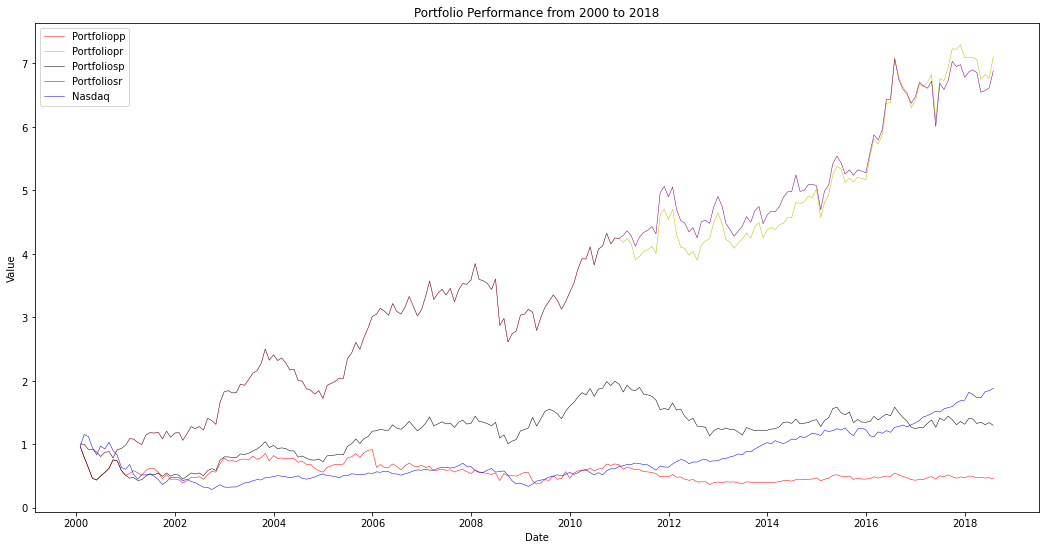

In [47]:
plt.figure(figsize=(18,9))
plt.plot(res2000pp['value'],color = 'r',linewidth = 0.5,label='Portfoliopp')
plt.plot(res2000pr['value'],color = 'y',linewidth = 0.5,label='Portfoliopr')
plt.plot(res2000sp['value'],color = 'black',linewidth = 0.5,label='Portfoliosp')
plt.plot(res2000sr['value'],color = 'purple',linewidth = 0.5,label='Portfoliosr')
plt.plot(Nasdaq2000['value'],color = 'b',linewidth = 0.5,label='Nasdaq')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 2000 to 2018')

Text(0.5, 1.0, 'Portfolio Performance from 1970 to 2000')

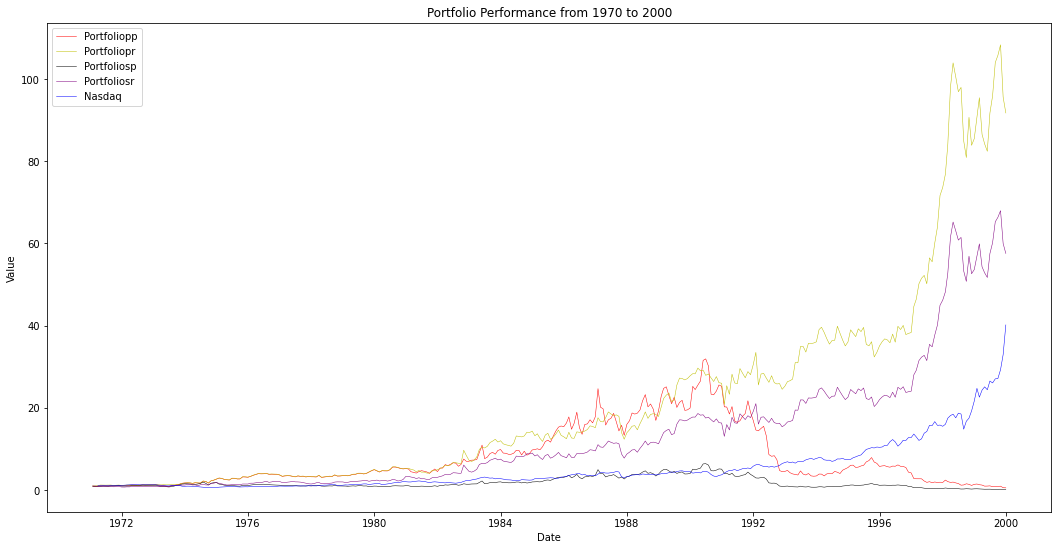

In [48]:
res_pre2000pp = total_respp.loc[:'1999','cumret']
res_pre2000pp = pd.DataFrame(res_pre2000pp)
res_pre2000pp['value'] = res_pre2000pp['cumret'].cumprod()

res_pre2000pr = total_respr.loc[:'1999','cumret']
res_pre2000pr = pd.DataFrame(res_pre2000pr)
res_pre2000pr['value'] = res_pre2000pr['cumret'].cumprod()

res_pre2000sp = total_ressp.loc[:'1999','cumret']
res_pre2000sp = pd.DataFrame(res_pre2000sp)
res_pre2000sp['value'] = res_pre2000sp['cumret'].cumprod()

res_pre2000sr = total_ressr.loc[:'1999','cumret']
res_pre2000sr = pd.DataFrame(res_pre2000sr)
res_pre2000sr['value'] = res_pre2000sr['cumret'].cumprod()

Nasdaq_pre2000 = Nasdaq.loc[:'1999','Return']
Nasdaq_pre2000 = pd.DataFrame(Nasdaq_pre2000)
Nasdaq_pre2000['value'] = (Nasdaq_pre2000['Return']+1).cumprod()

plt.figure(figsize=(18,9))
plt.plot(res_pre2000pp['value'],color = 'r',linewidth = 0.5,label='Portfoliopp')
plt.plot(res_pre2000pr['value'],color = 'y',linewidth = 0.5,label='Portfoliopr')
plt.plot(res_pre2000sp['value'],color = 'black',linewidth = 0.5,label='Portfoliosp')
plt.plot(res_pre2000sr['value'],color = 'purple',linewidth = 0.5,label='Portfoliosr')
plt.plot(Nasdaq_pre2000['value'],color = 'b',linewidth = 0.5,label='Nasdaq')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 1970 to 2000')

In [49]:
statspp = total_respp['act_ret'].describe()
statspp.loc['Sharpe'] = statspp.loc['mean'] / statspp.loc['std'] * np.sqrt(12)

statspr = total_respr['act_ret'].describe()
statspr.loc['Sharpe'] = statspr.loc['mean'] / statspr.loc['std'] * np.sqrt(12)

statssp = total_ressp['act_ret'].describe()
statssp.loc['Sharpe'] = statssp.loc['mean'] / statssp.loc['std'] * np.sqrt(12)

statssr = total_ressr['act_ret'].describe()
statssr.loc['Sharpe'] = statssr.loc['mean'] / statssr.loc['std'] * np.sqrt(12)

Sharpe = [statspp.loc['Sharpe'],statspr.loc['Sharpe'],statssp.loc['Sharpe'],statssr.loc['Sharpe']]
Sharpe = pd.DataFrame(Sharpe,columns=['Sharpe ratio'],index=['pp','pr','sp','sr'])
Sharpe

,Sharpe ratio
pp,-0.050804
pr,0.496859
sp,-0.098317
sr,0.446248


In [50]:
stats1pp = (total_respp['act_ret']+total_respp['rf']).describe()
stats1pr = (total_respr['act_ret']+total_respp['rf']).describe()
stats1sp = (total_ressp['act_ret']+total_respp['rf']).describe()
stats1sr = (total_ressr['act_ret']+total_respp['rf']).describe()

stats1 = pd.DataFrame(columns=['Annualized mean','Annualized volatility'],index=['pp','pr','sp','sr'])
stats1.loc['pp','Annualized mean'] = stats1pp.loc['mean']*12
stats1.loc['pp','Annualized volatility'] = stats1pp.loc['std']*np.sqrt(12)
stats1.loc['pr','Annualized mean'] = stats1pr.loc['mean']*12
stats1.loc['pr','Annualized volatility'] = stats1pr.loc['std']*np.sqrt(12)
stats1.loc['sp','Annualized mean'] = stats1sp.loc['mean']*12
stats1.loc['sp','Annualized volatility'] = stats1sp.loc['std']*np.sqrt(12)
stats1.loc['sr','Annualized mean'] = stats1sr.loc['mean']*12
stats1.loc['sr','Annualized volatility'] = stats1sr.loc['std']*np.sqrt(12)
stats1

,Annualized mean,Annualized volatility
pp,0.0286823,0.337839
pr,0.164242,0.238451
sp,0.0135904,0.328027
sr,0.155696,0.246537


In [51]:
Drawdownpp = []
for i in range(len(total_respp['value'])):
    if total_respp['value'].iloc[i]/np.max(total_respp['value'].iloc[0:i+1])-1<0:
        Drawdownpp.append(total_respp['value'].iloc[i]/max(total_respp['value'].iloc[0:i+1])-1)
    else:
        Drawdownpp.append(0)
Drawdownpp = pd.DataFrame(Drawdownpp,index=total_respp.index,columns=['DrawDownpp'])
MaxDDPeriodpp = Drawdownpp.loc[Drawdownpp['DrawDownpp']==Drawdownpp['DrawDownpp'].min()]

Drawdownpr = []
for i in range(len(total_respr['value'])):
    if total_respr['value'].iloc[i]/np.max(total_respr['value'].iloc[0:i+1])-1<0:
        Drawdownpr.append(total_respr['value'].iloc[i]/max(total_respr['value'].iloc[0:i+1])-1)
    else:
        Drawdownpr.append(0)
Drawdownpr = pd.DataFrame(Drawdownpr,index=total_respr.index,columns=['DrawDownpr'])
MaxDDPeriodpr = Drawdownpr.loc[Drawdownpr['DrawDownpr']==Drawdownpr['DrawDownpr'].min()]

Drawdownsp = []
for i in range(len(total_ressp['value'])):
    if total_ressp['value'].iloc[i]/np.max(total_ressp['value'].iloc[0:i+1])-1<0:
        Drawdownsp.append(total_ressp['value'].iloc[i]/max(total_ressp['value'].iloc[0:i+1])-1)
    else:
        Drawdownsp.append(0)
Drawdownsp = pd.DataFrame(Drawdownsp,index=total_ressp.index,columns=['DrawDownsp'])
MaxDDPeriodsp = Drawdownsp.loc[Drawdownsp['DrawDownsp']==Drawdownsp['DrawDownsp'].min()]

Drawdownsr = []
for i in range(len(total_ressr['value'])):
    if total_ressr['value'].iloc[i]/np.max(total_ressr['value'].iloc[0:i+1])-1<0:
        Drawdownsr.append(total_ressr['value'].iloc[i]/max(total_ressr['value'].iloc[0:i+1])-1)
    else:
        Drawdownsr.append(0)
Drawdownsr = pd.DataFrame(Drawdownsr,index=total_ressr.index,columns=['DrawDownsr'])
MaxDDPeriodsr = Drawdownsr.loc[Drawdownsr['DrawDownsr']==Drawdownsr['DrawDownsr'].min()]

MaxDD = pd.concat([MaxDDPeriodpp,MaxDDPeriodpr,MaxDDPeriodsp,MaxDDPeriodsr],axis=1)

In [52]:
MaxDD

,DrawDownpp,DrawDownpr,DrawDownsp,DrawDownsr
date,,,,
1987-11-30,NaN,-0.349521,NaN,-0.349521
2001-03-31,NaN,NaN,-0.99295,NaN
2012-10-31,-0.994,NaN,NaN,NaN
